# PCD Assignment 02

Daffa M. Siddiq - 24/533358/PA/22569

Pengolahan Citra Digital (KOM) - Assignment 2

---

Before we start the code and talk about each enhancement techniques, I will upload the five images that will be used as reference.

Make sure to upload a 1:1 grayscale image to allow the algorithm to work and display the image without streching.

In [1]:
# Input a grayscale image, as some techniques such as 'Histogram Equalisation' and 'Laplacian Sharpening' only works on grayscale image.
from google.colab import files
uploaded = files.upload()

Saving contrast.jpg to contrast.jpg
Saving dark.jpg to dark.jpg
Saving bright.jpg to bright.jpg
Saving blurred.jpg to blurred.jpg


# Image Enhancement

## Brief Explanation

**Image Negative**

This method practically reverses the intensity values of the image where dark areas suddenly become bright and vice versa. This method is particularly useful for enhancing white/grey details embedded in dark regions of an image.

It is commonly used in medical imaging, like x-rays, to show specific parts of body easier to analyse.

<br>

---

<br>

**Histogram Equalisation**

The method automatically adjusts image intensities to enhance contrast by spreading the frequent intensity values out.

It is used to improve contrast in low-contast images and works great when the image histogram is concentrated in a localised area.

<br>

---

<br>

**Contrast Stretching**

This method is also called "Piece-wise Linear Transformations". What is does is that it stretches a narrow orange of input intensity values to a wider range of output values -- practically increases the contrast between different regions.

It streches the histogram to fully use the 0-255 8-bit range.

<br>

---

<br>

**Laplacian Sharpen**

This sharpening filter highlights rapid intensity changes, the edges of an object, in an image by using second derivative.

It sharpens blurred images and enhances edges, but is sensitive to noise (e.g. High ISO photo), so it's usually combined with smoothing.

## Code Implementation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_multiple(images, titles, figsize=(20, 6)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

def image_negative(img):
    return 255 - img

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    img_float = img.astype(np.float32)
    min_val = np.min(img_float)
    max_val = np.max(img_float)
    stretched = 255 * (img_float - min_val) / (max_val - min_val)
    return stretched.astype(np.uint8)

def laplacian_sharpen(img):
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    sharpened = img - 0.5 * laplacian
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    return sharpened

<br>

---

<br>

Processing: contrast.jpg


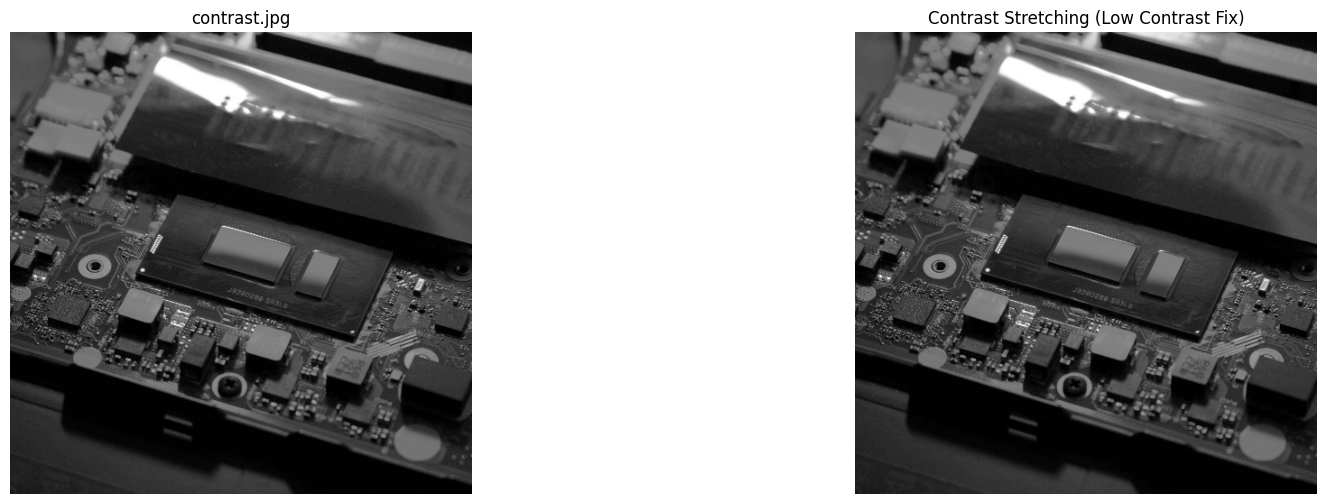

Processing: dark.jpg


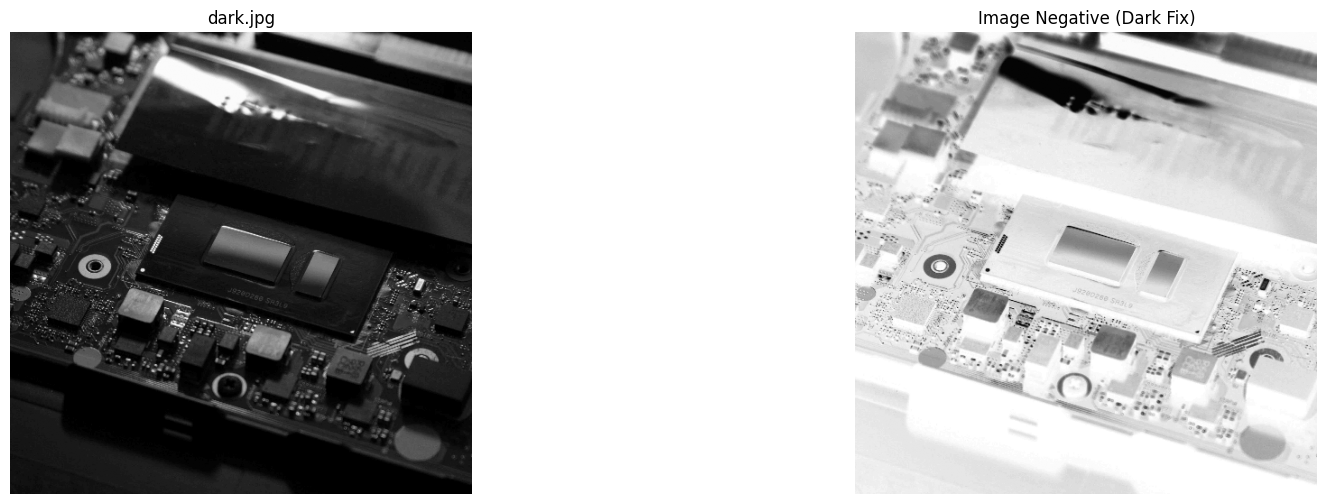

Processing: bright.jpg


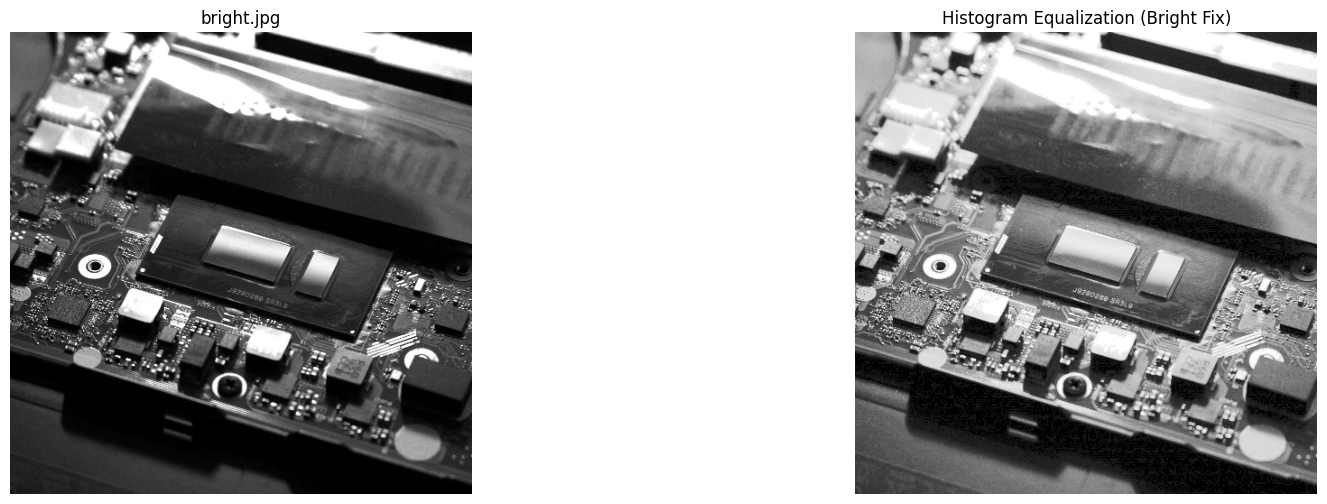

Processing: blurred.jpg


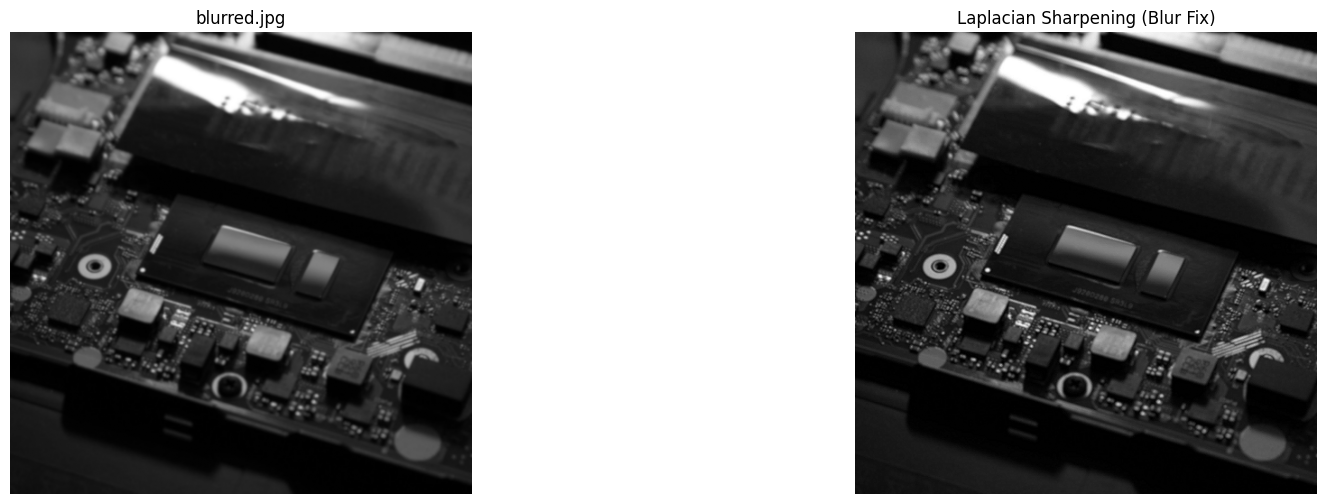

In [3]:
for filename in uploaded.keys():
    print(f"Processing: {filename}")
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))

    if "dark" in filename.lower():
        enhanced = image_negative(img)
        title = "Image Negative (Dark Fix)"
    elif "bright" in filename.lower():
        enhanced = histogram_equalization(img)
        title = "Histogram Equalization (Bright Fix)"
    elif "contrast" in filename.lower():
        enhanced = contrast_stretching(img)
        title = "Contrast Stretching (Low Contrast Fix)"
    elif "blurred" in filename.lower():
        enhanced = laplacian_sharpen(img)
        title = "Laplacian Sharpening (Blur Fix)"
    else:
        print(f"Skipping file {filename} — no matching enhancement.")
        continue

    show_multiple(
        [img, enhanced],
        [f"{filename}", title]
    )

# Thank You!

LOCALLY ROOTED

GLOBALLY RESPECTED